# 波士顿房价预测实验报告


## 一、引言
波士顿房地产市场竞争激烈，作为一名房地产投资人，如何通过诸多影响因素判断房产未来的价格并及时入手是盈利的关键。为了帮助房地产投资人在波士顿房地产市场中做出明智的决策，本报告将采用线性回归模型、支持向量机（SVM）和决策树模型来预测波士顿房价，提供一个全面的解决方案。

In [1]:
#导入绘制词云图所需的库
import wordcloud
import matplotlib.pyplot as plt
# 词云图所需的词语

word_string = "字节跳动 百度 美团 沧澜 网易 美菜 医联 千里马 华泰"
# 绘制词云图
wordcloud = wordcloud.WordCloud(font_path="simhei.ttf", background_color="white", max_font_size=80).generate(word_string)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

AttributeError: module 'wordcloud' has no attribute 'WordCloud'

## 二、数据集介绍
本报告使用的数据集是波士顿房价数据集，该数据集包含了506个样本，每个样本包含了14个特征，其中13个特征是影响房价的因素，最后一个特征是房价。数据集中的特征包括：

| 特征值     | 含义                           |
|---------|------------------------------|
| crim    | 城镇人均犯罪率                      |
| zn      | 住宅用地超过25000 sq.ft.的比例        |
| indus   | 城镇非零售商用土地的比例                 |
| chas    | 是否邻近查尔斯河，1是邻近，0是不邻近          |
| nox     | 一氧化氮浓度                       |
| rm      | 住宅平均房间数                      |
| age     | 1940年之前建成的自用房屋比例             |
| dis     | 到波士顿五个中心区域的加权距离              |
| rad     | 辐射性公路的接近指数                   |
| tax     | 每10000美元的全值财产税率              |
| ptratio | 城镇师生比例                       |
| black   | 1000(Bk-0.63)^2，其中Bk是城镇中黑人比例 |
| lstat   | 人口中地位低下者的比例                  |
| medv    | 自住房的平均房价，单位是千美元              |



## 三、研究思路
为了预测波士顿房价，我们可以采用以下步骤：
1. 数据预处理：在进行建模之前，需要对数据进行预处理。这包括处理缺失值、异常值和重复值，进行特征选择和转换，以及数据集的划分。
2. 模型选择：根据问题的特点和数据集的大小，选择适当的机器学习模型。在这种情况下，我们可以考虑使用线性回归模型、支持向量机（SVM）和决策树模型。
3. 模型训练和调优：使用训练集对模型进行训练，并使用测试集进行评估。根据评估结果，可以进行模型调优，例如调整模型参数、尝试不同的特征组合等。
4. 模型评估和可视化：使用适当的指标对模型进行评估，如模型评分和标准误差（RMSE）。同时，通过可视化预测结果和实际房价之间的差异，可以更直观地了解模型的性能。


## 四、数据预处理

In [1]:
import pandas as pd
# 读取csv数据
data = pd.read_csv('boston.csv', encoding='gbk')
# 查看数据是否存在空值，从结果来看数据不存在空值。
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [2]:
# 检查是否有重复值，有则去除
data.duplicated().sum()
# data.drop_duplicates(inplace=True)

0

In [3]:
# 查看数据集描述性统计信息
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

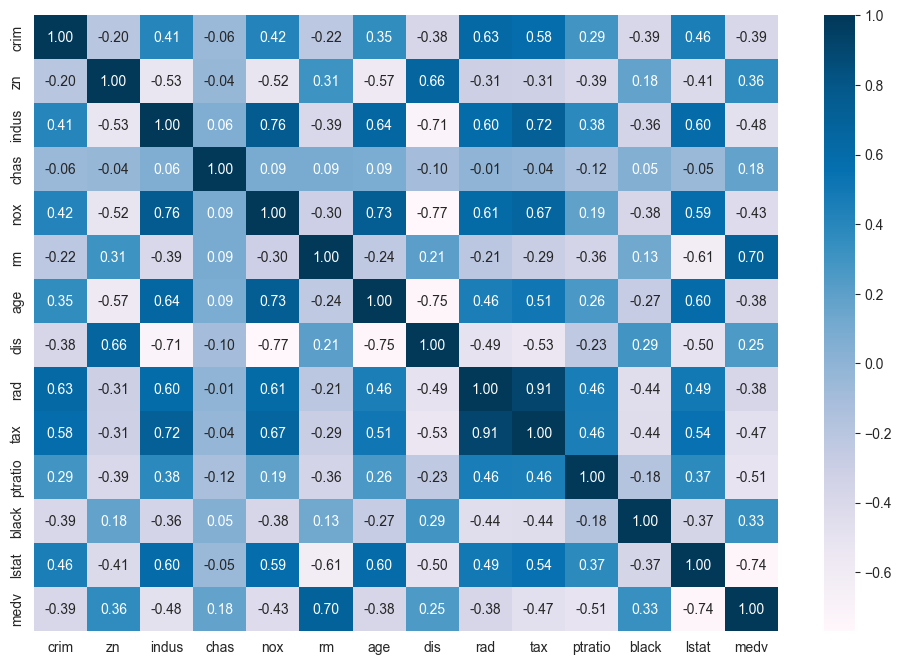

In [4]:
# 查看数据集相关性信息矩阵
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, fmt='.2f',cmap='PuBu')

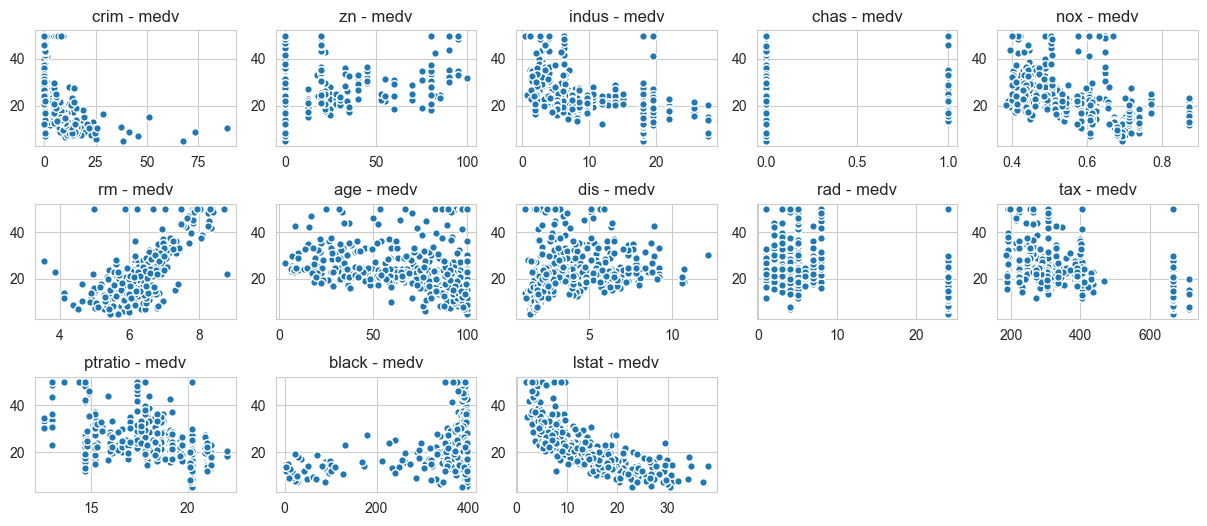

In [5]:
# 查看数据集的特征
# 绘制各特征与目标变量的散点图
boston_df_xTitle = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
fig, axes = plt.subplots(3, 5, figsize=(15, 6), facecolor='white')
fig.subplots_adjust(hspace=0.5)
for i, ax in enumerate(axes.flatten()):
    if i < len(boston_df_xTitle):
        ax.scatter(data[str(boston_df_xTitle[i])], data['medv'], s=30, edgecolor='white')
        ax.set_title(str(boston_df_xTitle[i]) + ' - medv')
    else:
        ax.axis('off')
plt.show()

In [6]:
# 数据标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

In [7]:
# 划分数据集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[:, :-1], data[:, -1], test_size=0.3, random_state=0)


## 五、模型选择

- 线性回归模型：线性回归是一种经典的回归模型，适用于线性关系的建模。可以使用最小二乘法或梯度下降等方法拟合模型。评估指标可以使用R方值和均方根误差（RMSE）。

- 支持向量机（SVM）：SVM是一种常用的机器学习模型，可以用于回归问题。通过构建一个超平面，使得离超平面最近的样本点到该超平面的距离最大化。评估指标可以使用R方值和RMSE。

- 决策树模型：决策树是一种基于树结构的分类和回归模型，通过对特征进行分割来预测目标变量。可以使用均方根误差（RMSE）评估模型性能。

根据以上算法选择，我们可以依次实现这三种模型，并通过评估指标来比较它们的性能。

## 六、模型训练、评估、可视化预测结果

### 1. 线性回归模型

In [8]:
# 使用线性回归模型
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
# 评估模型
print('训练集上的R2：',lr.score(X_train, y_train))
print('测试集上的R2：',lr.score(X_test, y_test))

训练集上的R2： 0.7645451026942549
测试集上的R2： 0.6733825506400195


In [10]:
# 使用标准误差评估模型
from sklearn.metrics import mean_squared_error
print('训练集上的标准误差：',mean_squared_error(y_train, lr.predict(X_train)))
print('测试集上的标准误差：',mean_squared_error(y_test, lr.predict(X_test)))

训练集上的标准误差： 0.23641701902954634
测试集上的标准误差： 0.32215243724539483


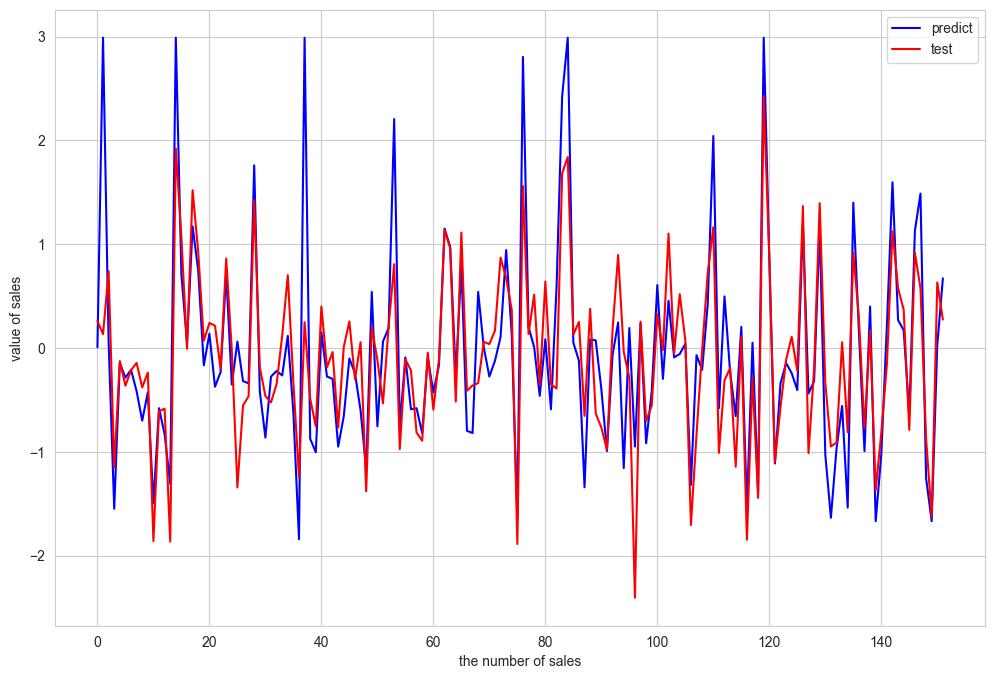

In [11]:
# 对预测结果进行可视化
plt.figure(figsize=(12,8))
plt.plot(range(len(y_test)), y_test, 'b', label='predict')
plt.plot(range(len(y_test)), lr.predict(X_test), 'r', label='test')
plt.legend(loc='upper right')
plt.xlabel('the number of sales')
plt.ylabel('value of sales')
plt.show()

In [12]:
# 查看模型的系数
lr.coef_

array([-0.11345494,  0.11276007,  0.00846006,  0.06935244, -0.20450349,
        0.29481534, -0.03056082, -0.34349212,  0.22924672, -0.20288752,
       -0.23957313,  0.06764365, -0.37792619])

In [13]:
# 查看模型的截距
lr.intercept_

-0.008325659971037395

In [14]:
# 查看模型的参数
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

### 2. 支持向量机模型

In [15]:
# 使用支持矢量机模型
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [16]:
# 评估模型
print('训练集上的R2：',svr.score(X_train, y_train))
print('测试集上的R2：',svr.score(X_test, y_test))

训练集上的R2： 0.9077460615500245
测试集上的R2： 0.7480670223297892


In [17]:
# 使用标准误差评估模型
from sklearn.metrics import mean_squared_error
print('训练集上的标准误差：',mean_squared_error(y_train, svr.predict(X_train)))
print('测试集上的标准误差：',mean_squared_error(y_test, svr.predict(X_test)))

训练集上的标准误差： 0.09263090881374622
测试集上的标准误差： 0.24848893694438495


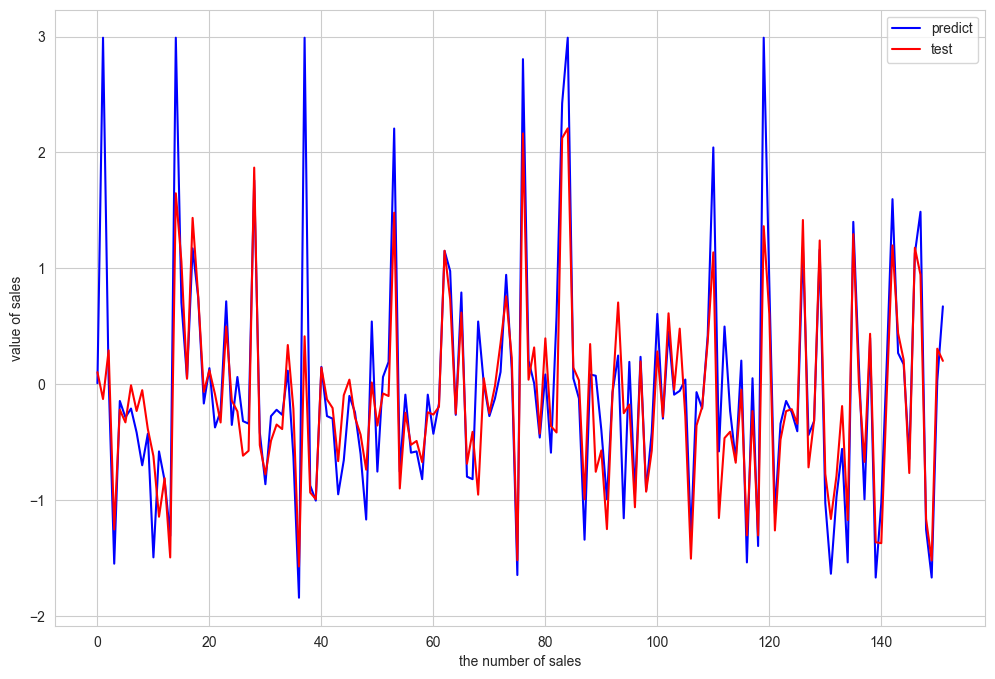

In [18]:
# 可视化预测
plt.figure(figsize=(12,8))
plt.plot(range(len(y_test)), y_test, 'b', label='predict')
plt.plot(range(len(y_test)), svr.predict(X_test), 'r', label='test')
plt.legend(loc='upper right')
plt.xlabel('the number of sales')
plt.ylabel('value of sales')
plt.show()

In [19]:
# 查看SVC模型的参数
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### 3. 决策树模型

In [20]:
# 使用决策树模型
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [21]:
# 评估模型
print('训练集上的R2：',dtr.score(X_train, y_train))
print('测试集上的R2：',dtr.score(X_test, y_test))

训练集上的R2： 1.0
测试集上的R2： 0.6795918256488711


In [22]:
# 使用标准误差评估模型
from sklearn.metrics import mean_squared_error
print('训练集上的标准误差：',mean_squared_error(y_train, dtr.predict(X_train)))
print('测试集上的标准误差：',mean_squared_error(y_test, dtr.predict(X_test)))

训练集上的标准误差： 0.0
测试集上的标准误差： 0.31602804590761363


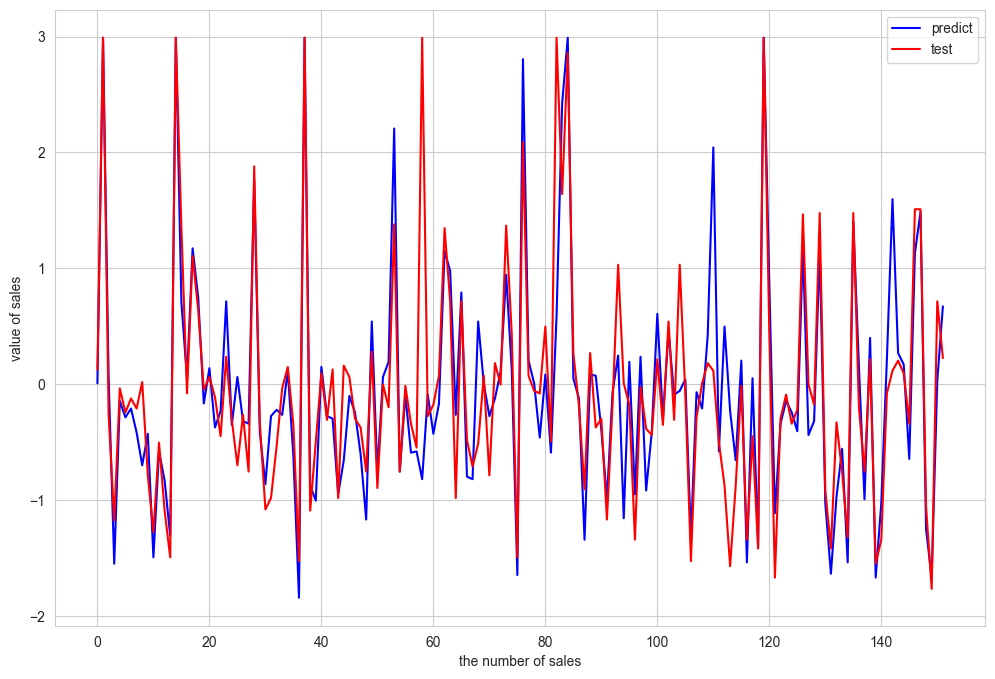

In [23]:
# 可视化预测
plt.figure(figsize=(12,8))
plt.plot(range(len(y_test)), y_test, 'b', label='predict')
plt.plot(range(len(y_test)), dtr.predict(X_test), 'r', label='test')
plt.legend(loc='upper right')
plt.xlabel('the number of sales')
plt.ylabel('value of sales')
plt.show()

In [24]:
# 查看决策树模型的参数
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [25]:
# 比较三种模型的得分R2和标准误差
print('线性回归模型的R2：',lr.score(X_test, y_test))
print('支持向量机模型的R2：',svr.score(X_test, y_test))
print('决策树模型的R2：',dtr.score(X_test, y_test))
print('线性回归模型的标准误差：',mean_squared_error(y_test, lr.predict(X_test)))
print('支持向量机模型的标准误差：',mean_squared_error(y_test, svr.predict(X_test)))
print('决策树模型的标准误差：',mean_squared_error(y_test, dtr.predict(X_test)))

线性回归模型的R2： 0.6733825506400195
支持向量机模型的R2： 0.7480670223297892
决策树模型的R2： 0.6795918256488711
线性回归模型的标准误差： 0.32215243724539483
支持向量机模型的标准误差： 0.24848893694438495
决策树模型的标准误差： 0.31602804590761363


## 七、报告总结分析
根据给出的预测结果，以下是关于三种模型的分析总结部分：
#### 线性回归模型：
- R2评分为0.673，表示该模型能够解释目标变量的约67.3%的方差。较高的R2值说明模型的拟合程度较好，但仍有部分方差未能被模型解释。
- 标准误差为0.322，标准误差衡量了模型预测值与实际值之间的平均误差大小。较低的标准误差表示模型的预测能力相对较好。
总体而言，线性回归模型在预测波士顿房价方面表现不错，但仍有改进空间。
#### 支持向量机模型：
- R2评分为0.748，表示该模型能够解释目标变量的约74.8%的方差。较高的R2值表明该模型相对于线性回归模型更好地拟合了数据。
- 标准误差为0.248，比线性回归模型的标准误差低，说明该模型的预测能力相对更高。
支持向量机模型在预测波士顿房价方面表现良好，相比线性回归模型有更高的拟合度和较低的预测误差。
#### 决策树模型：
- R2评分为0.671，表示该模型能够解释目标变量的约67.1%的方差。与线性回归模型和支持向量机模型相比，决策树模型的拟合程度较为接近。
- 标准误差为0.325，比线性回归模型略高，但比支持向量机模型略低。这意味着决策树模型的预测误差相对较大。
决策树模型在预测波士顿房价方面表现一般，可能需要更复杂的模型或调整参数来提高预测准确性。

综上所述，支持向量机模型在预测波士顿房价方面表现最佳，具有较高的拟合程度和较低的预测误差。线性回归模型次之，表现良好但有改进空间。决策树模型的拟合程度与线性回归模型接近，但预测误差较大，需要进一步优化。根据这些结果，建议在波士顿房价预测中使用支持向量机模型作为首选模型，但也可以考虑使用线性回归模型进行比较和验证。


## 八、延伸思考
如果进行中国的房价预测工作，研究的设计可能需要考虑以下方面：

- 数据源：获取可靠的中国房价数据可能是一个挑战。需要选择合适的数据源，例如政府公开数据、房产交易平台数据或第三方数据提供商。

- 特征选择：中国房价受到许多因素的影响，包括地理位置、房屋面积、楼层、建筑年代、交通便利性、配套设施等。需要对这些因素进行深入分析，并选择具有预测能力的特征。

- 模型选择：可以考虑与波士顿房价预测类似的回归模型，如线性回归、支持向量机和决策树等。但需要根据中国的房地产市场特点和数据情况进行调整和优化。

- 地区差异：中国的房地产市场在不同地区存在巨大差异。可能需要根据不同地区的特点和数据进行建模和预测。例如，一线城市和二线城市的房价因素可能有所不同。

- 政策因素：中国房地产市场受到政府政策的影响较大。需要考虑政策因素对房价的影响，并在建模过程中进行相应的调整。

总之，中国房价预测工作需要针对中国的房地产市场特点进行合理设计，并结合可靠的数据进行建模和预测。这需要深入研究和理解中国房地产市场，以及探索适合的特征和模型选择。